In [77]:
import astropy.table
import pandas as pd
from wuvars.analysis.variability_selection import data_nuller, sq2, sq2_variables

dat = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv11/WSERV11_graded_clipped0.95_scrubbed0.1_dusted0.5_new_error_corrected.fits")
df = dat.to_pandas()
data_nuller(df)
dat_again = astropy.table.Table.from_pandas(df)

wserv=11
spreadsheet_path = os.path.join("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts",
                                f"wserv{str(wserv)}",
                                f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",)

ds = pd.read_hdf(spreadsheet_path, key='table')

q2 = sq2(ds, 50, 150)
v2 = sq2_variables(ds, 50, 150)

ds[v2].index

Int64Index([45195940855911, 45195940856121, 45195940859540, 45195940859550,
            45195940859676, 45195940859834, 45195940859952, 45195940863111,
            45195940863207, 45195940863248,
            ...
            45195940910948, 45195940910968, 45195940910985, 45195940911023,
            45195940911059, 45195940911189, 45195940911195, 45195940911608,
            45195940911718, 45195940912031],
           dtype='int64', name='SOURCEID', length=229)

In [60]:
from

,SOURCEID,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
0,45195940855819,57686.575201,1.599821,-0.116936,NaN,NaN,NaN,NaN,19.083769,0.116208,...,NaN,NaN,0.0,NaN,NaN,1,0.050000,1.000000,0.993258,0.983206
1,45195940855819,57703.574826,1.599820,-0.116937,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,1,0.050000,0.998366,0.982083,0.984825
2,45195940855819,57756.292346,1.599819,-0.116937,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,1,0.050000,1.000000,0.998879,0.987988
3,45195940855819,57762.398985,1.599820,-0.116935,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,1,0.050000,1.000000,0.992135,0.980363
4,45195940855827,57674.611825,1.599798,-0.118659,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0.050000,0.998285,0.592075,0.988006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989611,45195940913180,57495.237338,1.602422,-0.103346,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2,0.734694,0.952459,0.834842,0.862928
2989612,45195940913180,57496.234363,1.602422,-0.103346,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-2,0.486486,0.988372,0.971559,0.961420
2989613,45195940913180,57497.232901,1.602422,-0.103345,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,0.999657,0.980000,0.973714,0.964286
2989614,45195940913180,57498.232338,1.602422,-0.103346,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,-1,0.992684,0.922697,0.877690,0.946071


In [50]:
dat_by_source = dat_again.group_by("SOURCEID")
print(dat_by_source.groups.keys)

   SOURCEID   
--------------
45195940855819
45195940855827
45195940855830
45195940855833
45195940855837
45195940855839
45195940855840
45195940855841
45195940855842
45195940855843
           ...
45195940913112
45195940913125
45195940913131
45195940913133
45195940913141
45195940913146
45195940913158
45195940913167
45195940913172
45195940913173
45195940913180
Length = 37947 rows


In [78]:
sourceid = 45195940855911

# dat_by_source.groups.
dat_source = dat_by_source.groups[dat_by_source.groups.keys['SOURCEID'] == sourceid]

In [79]:
dat_source

SOURCEID,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,HAPERMAG3,HAPERMAG3ERR,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
int64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,int16,float32,float32,float32,float32
45195940855911,57374.516613,1.5997030635456402,-0.1187476361430261,0.55767727,0.027041843,0.24654388,0.028367326,16.129356,0.014816022,15.571679,0.013561121,15.325135,0.016667983,0.0,0.0,0.0,-1,0.9996572,0.99488056,0.97532314,0.9909366
45195940855911,57374.521223,1.5997029169145676,-0.11874817450775244,0.48576164,0.02797745,0.39007854,0.029784486,16.247583,0.015748154,15.761822,0.014010041,15.371743,0.018189829,0.0,0.0,0.0,-2,0.33333337,0.995114,0.9898763,0.9726027
45195940855911,57383.512002,1.5997030908665961,-0.11874774023635222,--,--,--,--,--,--,--,--,15.35031,0.018632483,--,--,0.0,-1,0.9996572,0.943958,0.85276794,0.974359
45195940855911,57383.5169907,1.5997030095166922,-0.1187482156724477,--,--,--,--,--,--,15.747947,0.017208712,--,--,--,0.0,--,-1,0.9446064,0.9491803,0.96062994,0.9392097
45195940855911,57386.490648,1.5997030197126965,-0.11874775482703107,0.5685673,0.028127111,0.23208618,0.029246595,16.140602,0.015936181,15.572035,0.014035309,15.339949,0.01746291,0.0,0.0,0.0,-1,0.9996572,0.97602737,0.9716312,0.9715569
45195940855911,57386.495077,1.5997028172028671,-0.11874826137777654,--,--,--,--,16.274233,0.017593822,--,--,15.45551,0.01987295,0.0,--,0.0,-1,0.9446064,0.9853181,0.9189189,0.95858896
45195940855911,57403.2600967,1.599703221544608,-0.11874765923202919,0.5515661,0.027154863,0.22528458,0.02818929,16.132826,0.015247945,15.58126,0.013258263,15.355975,0.01667184,0.0,0.0,0.0,-1,0.9446064,0.9726496,0.9882491,0.9787557
45195940855911,57403.265822,1.5997030276195243,-0.1187483854616401,0.5779133,0.027807033,0.36197567,0.02848068,16.247158,0.015629623,15.669245,0.013872747,15.307269,0.016564671,0.0,0.0,0.0,1,0.05247814,0.9902755,0.9921348,0.9773414
45195940855911,57405.2724343,1.5997031811506488,-0.11874769032275365,0.5576105,0.02672094,0.24530697,0.02800083,16.129808,0.014803273,15.572198,0.013060806,15.326891,0.016575282,0.0,0.0,0.0,-1,0.9996572,0.9898305,0.9882491,0.98325723


In [85]:
ds[v2].index

Int64Index([45195940855911, 45195940856121, 45195940859540, 45195940859550,
            45195940859676, 45195940859834, 45195940859952, 45195940863111,
            45195940863207, 45195940863248,
            ...
            45195940910948, 45195940910968, 45195940910985, 45195940911023,
            45195940911059, 45195940911189, 45195940911195, 45195940911608,
            45195940911718, 45195940912031],
           dtype='int64', name='SOURCEID', length=229)

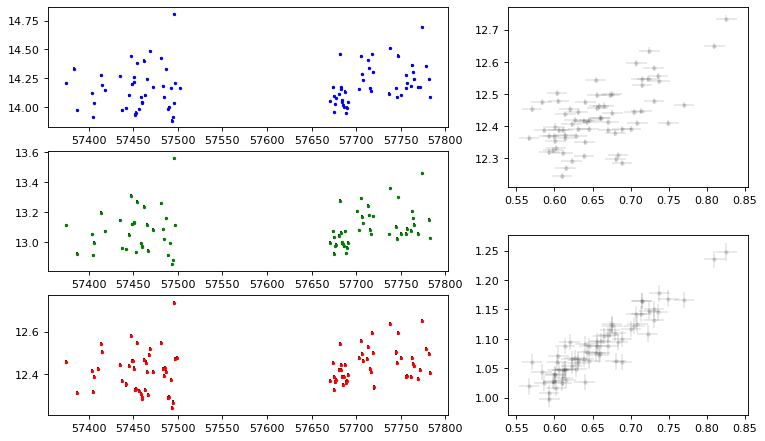

In [88]:
%run ../lightcurve.py
sourceid = 45195940911195
fig = simple_lc(dat_by_source, sourceid)

In [45]:
dat.to_pandas()

,SOURCEID,MEANMJDOBS,RA,DEC,JMHPNT,JMHPNTERR,HMKPNT,HMKPNTERR,JAPERMAG3,JAPERMAG3ERR,...,KAPERMAG3,KAPERMAG3ERR,JPPERRBITS,HPPERRBITS,KPPERRBITS,MERGEDCLASS,PSTAR,JGRADE,HGRADE,KGRADE
0,45195940855819,57686.575201,1.599821,-0.116936,-9.999995e+08,1.040192e+09,-9.999995e+08,1.040192e+09,1.908377e+01,1.162084e-01,...,-9.999995e+08,9.268220e+08,0,0,0,1,0.050000,1.000000,0.993258,0.983206
1,45195940855819,57703.574826,1.599820,-0.116937,-9.999995e+08,1.040192e+09,-9.999995e+08,1.040192e+09,-9.999995e+08,9.268220e+08,...,-9.999995e+08,9.268220e+08,0,0,0,1,0.050000,0.998366,0.982083,0.984825
2,45195940855819,57756.292346,1.599819,-0.116937,-9.999995e+08,1.040192e+09,-9.999995e+08,1.040192e+09,-9.999995e+08,9.268220e+08,...,-9.999995e+08,9.268220e+08,0,0,0,1,0.050000,1.000000,0.998879,0.987988
3,45195940855819,57762.398985,1.599820,-0.116935,-9.999995e+08,1.040192e+09,-9.999995e+08,1.040192e+09,-9.999995e+08,9.268220e+08,...,-9.999995e+08,9.268220e+08,0,0,0,1,0.050000,1.000000,0.992135,0.980363
4,45195940855827,57674.611825,1.599798,-0.118659,-9.999995e+08,1.040192e+09,-9.999995e+08,1.040192e+09,-9.999995e+08,9.268220e+08,...,-9.999995e+08,9.268220e+08,0,557056,0,1,0.050000,0.998285,0.592075,0.988006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989611,45195940913180,57495.237338,1.602422,-0.103346,2.851810e-01,1.085947e-01,4.169445e-01,1.366419e-01,1.725572e+01,5.274059e-02,...,-9.999995e+08,9.078638e-02,4194304,4194368,4194368,-2,0.734694,0.952459,0.834842,0.862928
2989612,45195940913180,57496.234363,1.602422,-0.103346,-9.999995e+08,1.040192e+09,-9.999995e+08,1.040192e+09,1.781006e+01,5.864205e-02,...,1.649912e+01,5.111450e-02,4194368,0,4194368,-2,0.486486,0.988372,0.971559,0.961420
2989613,45195940913180,57497.232901,1.602422,-0.103345,1.087986e+00,6.548948e-02,2.122650e-01,6.090930e-02,1.757961e+01,4.866021e-02,...,1.627936e+01,4.368301e-02,4194368,4194304,4194368,-1,0.999657,0.980000,0.973714,0.964286
2989614,45195940913180,57498.232338,1.602422,-0.103346,7.398663e-01,1.167700e-01,5.385876e-01,9.496927e-02,-9.999995e+08,8.118174e-02,...,-9.999995e+08,5.409048e-02,4194368,4194368,4194368,-1,0.992684,0.922697,0.877690,0.946071
